In [97]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install nltk
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install -U scikit-learn
!{sys.executable} -m pip install matplotlib

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [99]:
# Getting the dataset
fields=['target','ids','date','query','user','text']
df = pd.read_csv("tweetsentimentdata.csv", encoding="ISO-8859-1", names=fields)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   query   1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [100]:
pd.options.display.max_colwidth = 280

In [101]:
df.head(10)

,target,ids,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,"@LOLTrish hey long time no see! Yes.. Rains a bit ,only a bit LOL , I'm fine thanks , how's you ?"
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [102]:
df.tail(10)

,target,ids,date,query,user,text
1599990,4,2193579249,Tue Jun 16 08:38:59 PDT 2009,NO_QUERY,razzberry5594,WOOOOO! Xbox is back
1599991,4,2193579284,Tue Jun 16 08:38:59 PDT 2009,NO_QUERY,AgustinaP,@rmedina @LaTati Mmmm That sounds absolutely perfect... but my schedule is full. I won't have time to lay in bed until Sunday. Ugh!!
1599992,4,2193579434,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,sdancingsteph,ReCoVeRiNg FrOm ThE lOnG wEeKeNd
1599993,4,2193579477,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,ChloeAmisha,@SCOOBY_GRITBOYS
1599994,4,2193579489,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,EvolveTom,"@Cliff_Forster Yeah, that does work better than just waiting for it In the end I just wonder if I have time to keep up a good blog."
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best feeling ever
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interviews! â« http://blip.fm/~8bmta
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me for details
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity @SpeakingUpH4H


In [103]:
# Removing unnecessary columns
df = df[['target', 'text']]
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   text    1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
5,0,@Kwesidei not the whole crew
6,0,Need a hug
7,0,"@LOLTrish hey long time no see! Yes.. Rains a bit ,only a bit LOL , I'm fine thanks , how's you ?"
8,0,@Tatiana_K nope they didn't have it
9,0,@twittera que me muera ?


Negative    800000
Positive    800000
Name: target, dtype: int64


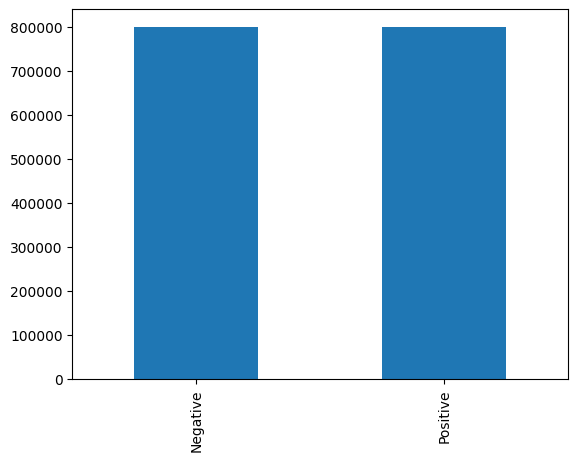

In [104]:
# Visualize the data sentiment distribution
sentiments = {0: "Negative", 4: "Positive"}
print(df.target.apply(lambda x: sentiments[x]).value_counts())
df.target.apply(lambda x: sentiments[x]).value_counts().plot(kind = 'bar')
plt.show()

In [105]:
# Clean the text data: 
# remove usernames, urls, hashtags, numbers, and dates
# downcast to lowercase

# patterns
url = r'https?:\/\/[\w\-\.]+\.[a-zA-Z]{2,}\/?\S*'
username = r'@\w+'
hashtag = r'#\w+'
dates = r'\d{4}-\d{2}-\d{2}'

#removing
df['text'] = df['text'].replace(to_replace=r'\d+', value='', regex=True)
df['text'] = df['text'].replace(to_replace=url, value='', regex=True)
df['text'] = df['text'].replace(to_replace=username, value='', regex=True)
df['text'] = df['text'].replace(to_replace=hashtag, value='', regex=True)
df['text'] = df['text'].replace(to_replace=dates, value='', regex=True)

# lowercase text
#df['text'] = df['text'].astype('category')
df['text'] = df['text'].str.lower()

df.head(10)

,target,text
0,0,"- awww, that's a bummer. you shoulda got david carr of third day to do it. ;d"
1,0,is upset that he can't update his facebook by texting it... and might cry as a result school today also. blah!
2,0,i dived many times for the ball. managed to save % the rest go out of bounds
3,0,my whole body feels itchy and like its on fire
4,0,"no, it's not behaving at all. i'm mad. why am i here? because i can't see you all over there."
5,0,not the whole crew
6,0,need a hug
7,0,"hey long time no see! yes.. rains a bit ,only a bit lol , i'm fine thanks , how's you ?"
8,0,nope they didn't have it
9,0,que me muera ?


In [106]:
# stopwords -> words that do not add much meaning to a sentence, such as 'the', 'have', 'she

# Remove stopwords. Using nltk library to remove stopwords
nltk.download('stopwords')

# getting stopwords
stop_words = set(stopwords.words('english'))

df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

df.head(10)

[nltk_data] Downloading package stopwords to /Users/jenny/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,target,text
0,0,"- awww, that's bummer. shoulda got david carr third day it. ;d"
1,0,upset can't update facebook texting it... might cry result school today also. blah!
2,0,dived many times ball. managed save % rest go bounds
3,0,whole body feels itchy like fire
4,0,"no, behaving all. i'm mad. here? can't see there."
5,0,whole crew
6,0,need hug
7,0,"hey long time see! yes.. rains bit ,only bit lol , i'm fine thanks , how's ?"
8,0,nope
9,0,que muera ?


In [111]:
#checking list of stopwords
#do we want to add or subtract any??
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [112]:
#remove punctuation
punct = r'[^\w\s]+'
df['text'] = df['text'].replace(to_replace=punct, value='', regex=True)

df.head(10)

,target,text
0,0,awww thats bummer shoulda got david carr third day
1,0,upset cant update facebook texting might cry result school today also blah
2,0,dived many times ball managed save rest go bounds
3,0,whole body feels itchy like fire
4,0,behaving im mad cant see
5,0,whole crew
6,0,need hug
7,0,hey long time see yes rains bit bit lol im fine thanks hows
8,0,nope
9,0,que muera


In [113]:
#remove stopwords again b/c some had punctuation next to chars(...)
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

#rated zeros
df.head(10)

,target,text
0,0,awww thats bummer shoulda got david carr third day
1,0,upset cant update facebook texting might cry result school today also blah
2,0,dived many times ball managed save rest go bounds
3,0,whole body feels itchy like fire
4,0,behaving im mad cant see
5,0,whole crew
6,0,need hug
7,0,hey long time see yes rains bit bit lol im fine thanks hows
8,0,nope
9,0,que muera


In [114]:
#rated 4s
df.tail(10)

,target,text
1599990,4,wooooo xbox back
1599991,4,mmmm sounds absolutely perfect schedule full time lay bed sunday ugh
1599992,4,recovering long weekend
1599993,4,
1599994,4,yeah work better waiting end wonder time keep good blog
1599995,4,woke school best feeling ever
1599996,4,thewdbcom cool hear old walt interviews â
1599997,4,ready mojo makeover ask details
1599998,4,happy th birthday boo alll time tupac amaru shakur
1599999,4,happy
